## Import Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df2 = pd.read_csv('Data_grouped_by_date.csv', parse_dates=['date'], infer_datetime_format=True)
df2 = df2.set_index(['date'])

# Decomposition
- Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.
- Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.
- A stationary time series is one whose properties do not depend on the time at which the series is observed. From decomposition it can be seen that our target variables % Iron Concentrate & % Silica Concentrate are stationary.

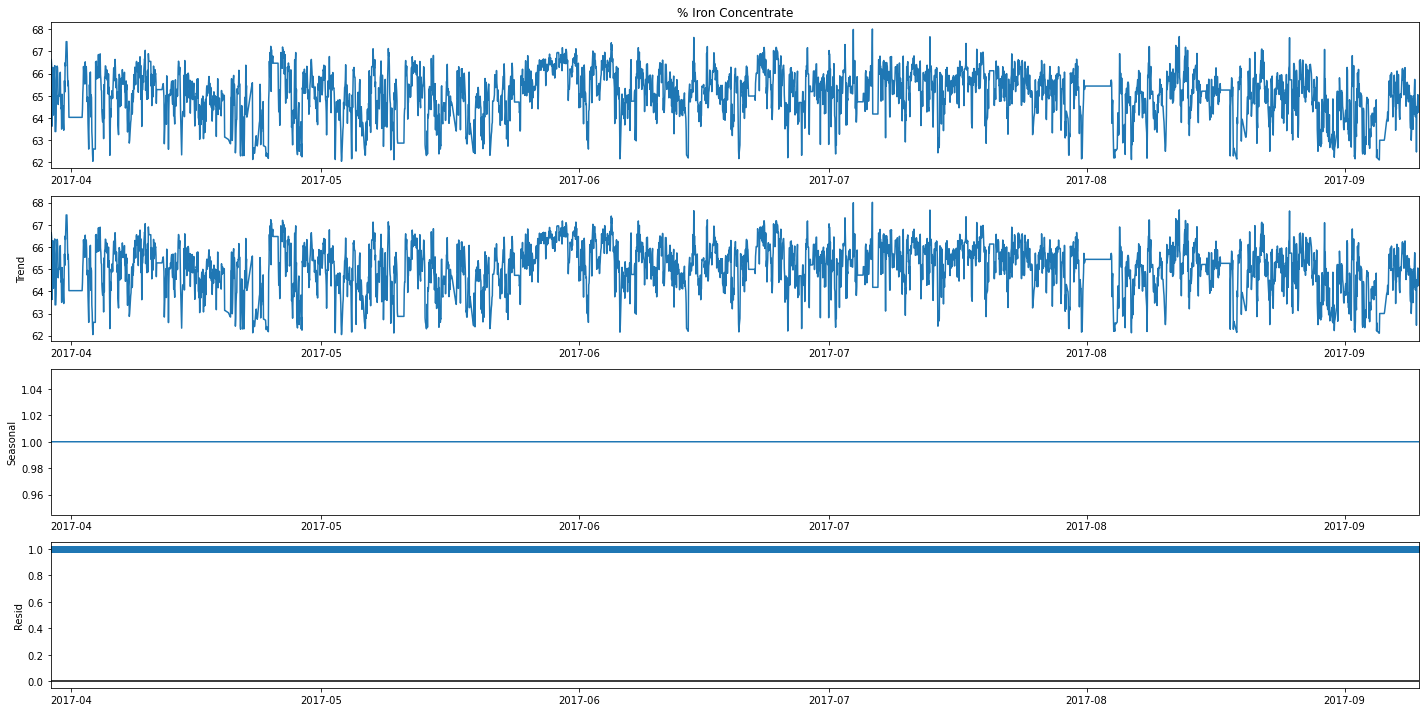

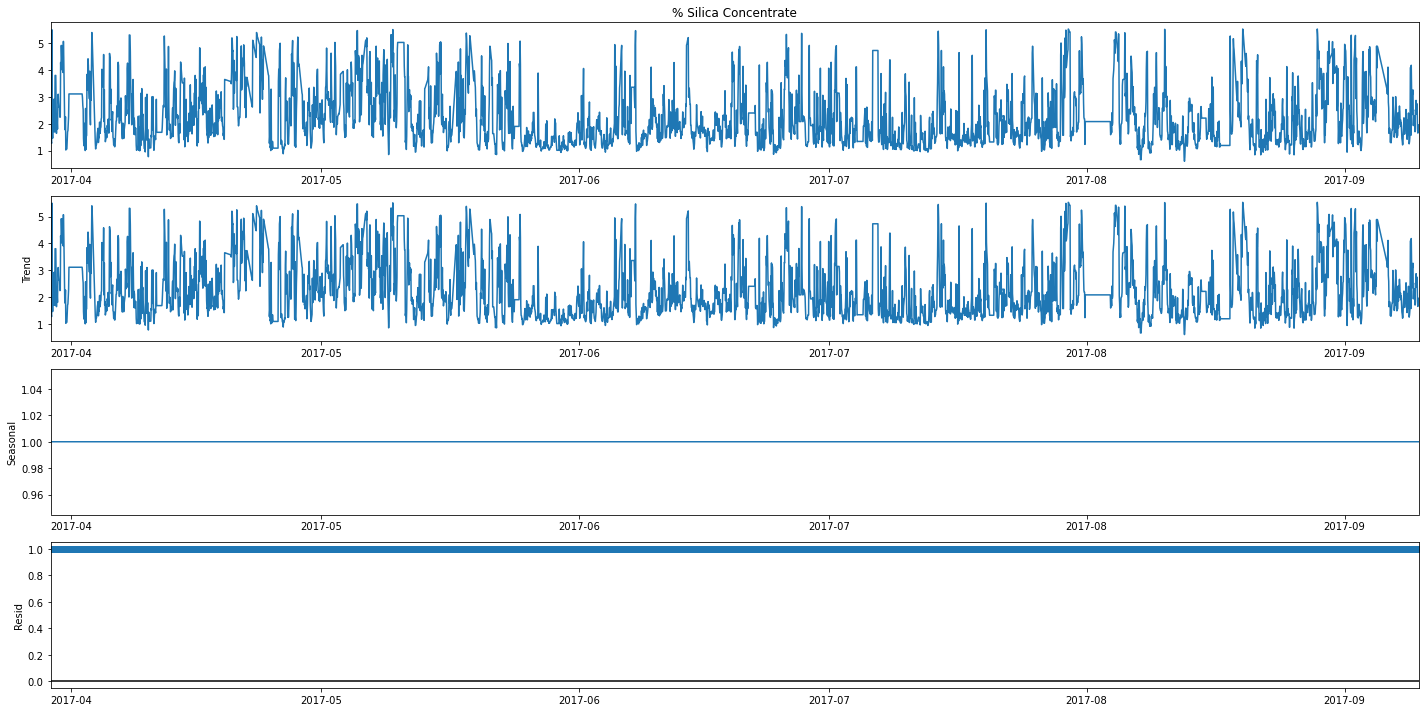

In [23]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
pyplot.rcParams["figure.figsize"] = (20,10)

result = seasonal_decompose(df2['% Iron Concentrate'], model='multiplicative', period=1)
result.plot()
pyplot.show()

result = seasonal_decompose(df2['% Silica Concentrate'], model='multiplicative', period=1)
result.plot()
pyplot.show()

**There are three fundamental steps of building a quality forecasting time series model: making the data stationary, selecting the right model, and evaluating model accuracy.**

# Moving Average (MA)

- Moving average value can be used directly to make predictions.
- This is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for.
- As new observations are made ever hour, the model can be updated and a prediction made for the next hour(s).

In [104]:
from numpy import mean
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#create lists to store model results
rolling_window_size = []
MAE_list = []
R2_list = []
MSE_list = []

# test different rolling window values
for value in range(1,10):
    # create history variable which will record past entries and test variable which holds the correct values
    X = df2['% Iron Concentrate']
    window = value
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()

    # create predictions using past history and time steps
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        
    #collect the model scores for test dataset
    rolling_window_size.append(value)
    MAE_list.append(mean_absolute_error(test,predictions))
    R2_list.append(r2_score(test,predictions))
    MSE_list.append(mean_squared_error(test,predictions))

#display results  
print('% Iron Concentrate Results')
MA_iron = pd.DataFrame({
        'Rolling Window Size':rolling_window_size,
        'R2':R2_list,
        'MAE':MAE_list,
        'MSE':MSE_list
}).set_index(['Rolling Window Size'])

display(MA_iron)

#now redo for silica

#create lists to store model results
rolling_window_size = []
MAE_list = []
R2_list = []
MSE_list = []

# test different rolling window values
for value in range(1,10):
    # create history variable which will record past entries and test variable which holds the correct values
    X = df2['% Silica Concentrate']
    window = value
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()

    # create predictions using past history and time steps
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        
    #collect the model scores for test dataset
    rolling_window_size.append(value)
    MAE_list.append(mean_absolute_error(test,predictions))
    R2_list.append(r2_score(test,predictions))
    MSE_list.append(mean_squared_error(test,predictions))

#display results  
print('% Silica Concentrate Results')
MA_silica = pd.DataFrame({
        'Rolling Window Size':rolling_window_size,
        'R2':R2_list,
        'MAE':MAE_list,
        'MSE':MSE_list
}).set_index(['Rolling Window Size'])

display(MA_silica)

% Iron Concentrate Results


,R2,MAE,MSE
Rolling Window Size,,,
1,0.499597,0.540028,0.615591
2,0.527995,0.536884,0.580518
3,0.499116,0.558779,0.615862
4,0.456963,0.586662,0.667597
5,0.417028,0.614863,0.716585
6,0.380174,0.636899,0.761866
7,0.348325,0.656953,0.800965
8,0.318517,0.676403,0.837541
9,0.294223,0.691941,0.867476


% Silica Concentrate Results


,R2,MAE,MSE
Rolling Window Size,,,
1,0.559575,0.456278,0.552482
2,0.566908,0.477800,0.543333
3,0.539079,0.504602,0.578277
4,0.497046,0.536787,0.631030
5,0.456786,0.567416,0.680325
6,0.419358,0.594253,0.727316
7,0.384775,0.618818,0.770714
8,0.354224,0.639910,0.809126
9,0.328324,0.657979,0.841746


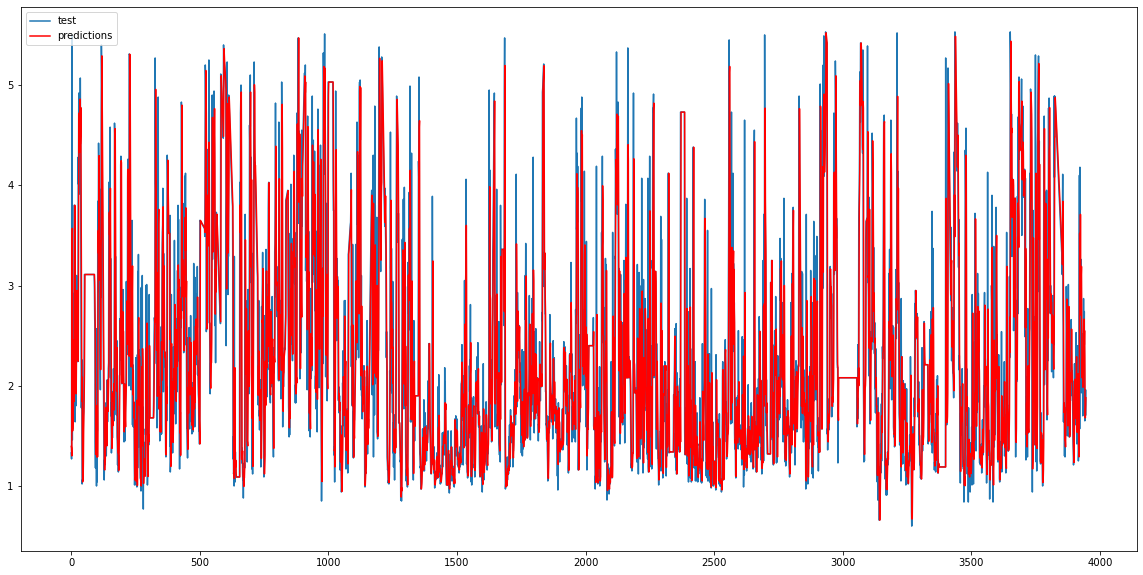

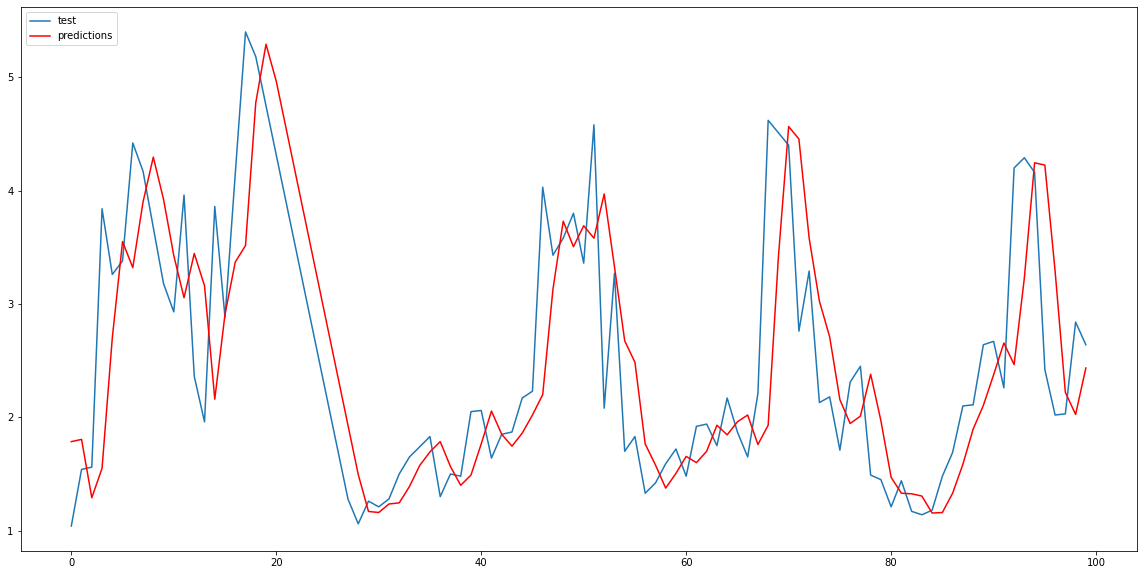

In [105]:
# we will now graph the results for visiual interpertation

# create history variable which will record past entries and test variable which holds the correct values
X = df2['% Silica Concentrate']
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# create predictions using past history and time steps
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

# plot
plt.plot(test, label ='test')
plt.plot(predictions, color='red',label = 'predictions')
plt.legend(loc='upper left', prop={'size': 10}) 
plt.show()

# zoom plot
plt.plot(test[100:200],label ='test')
plt.plot(predictions[100:200], color='red',label = 'predictions')
plt.legend(loc='upper left', prop={'size': 10}) 
plt.show()